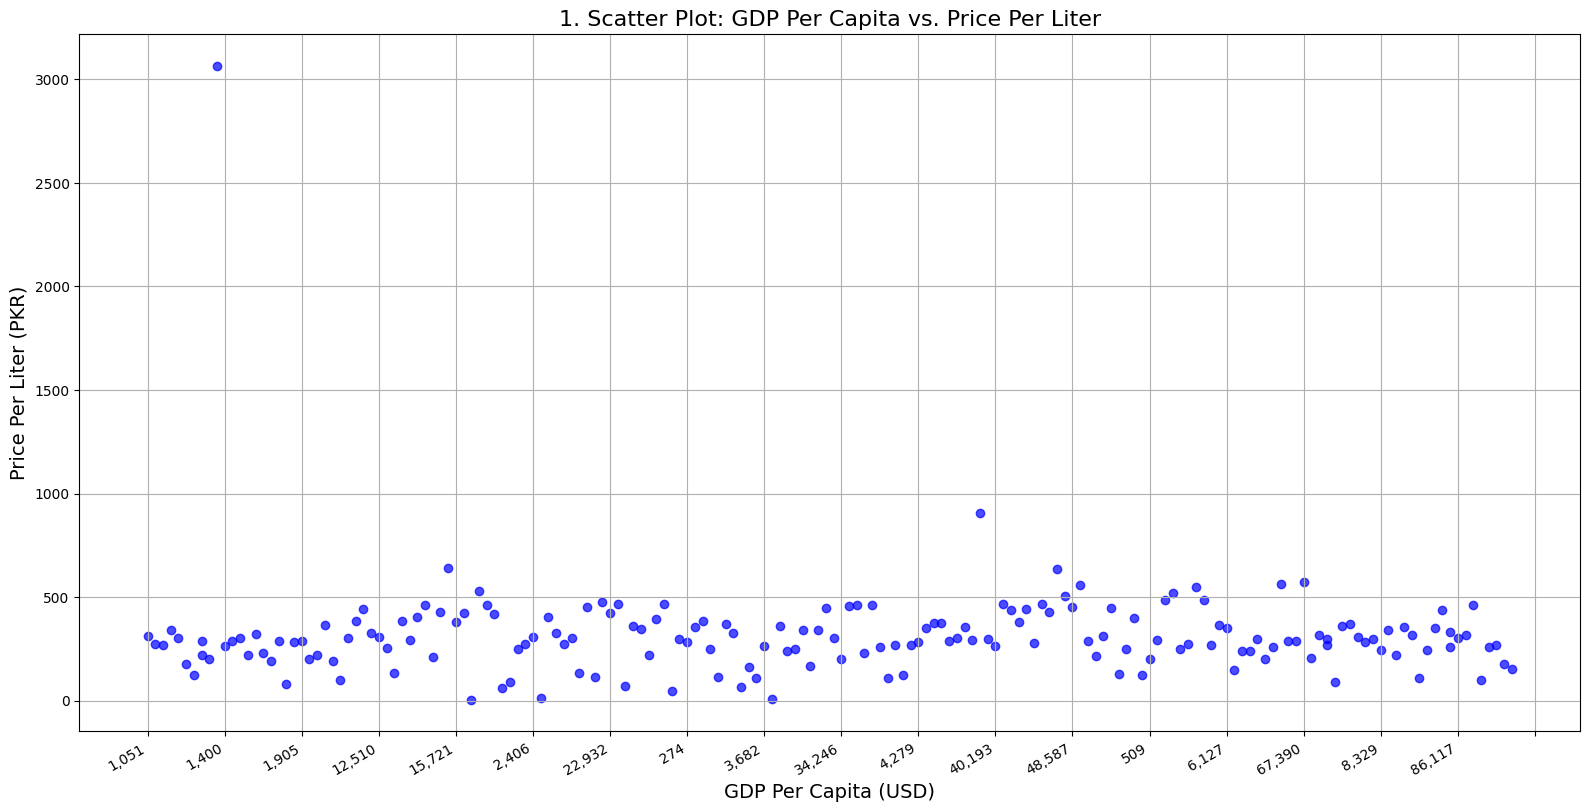

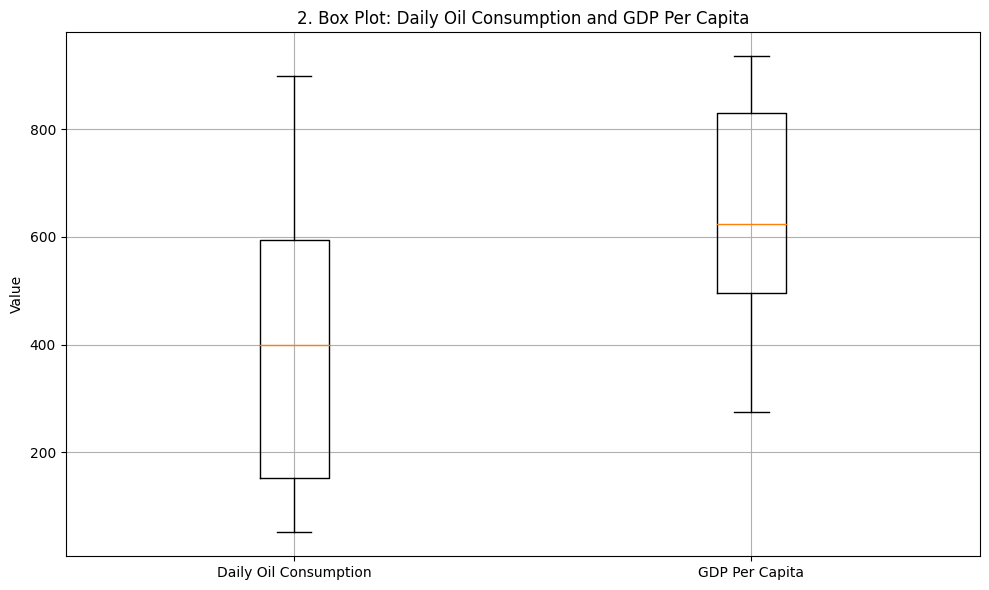

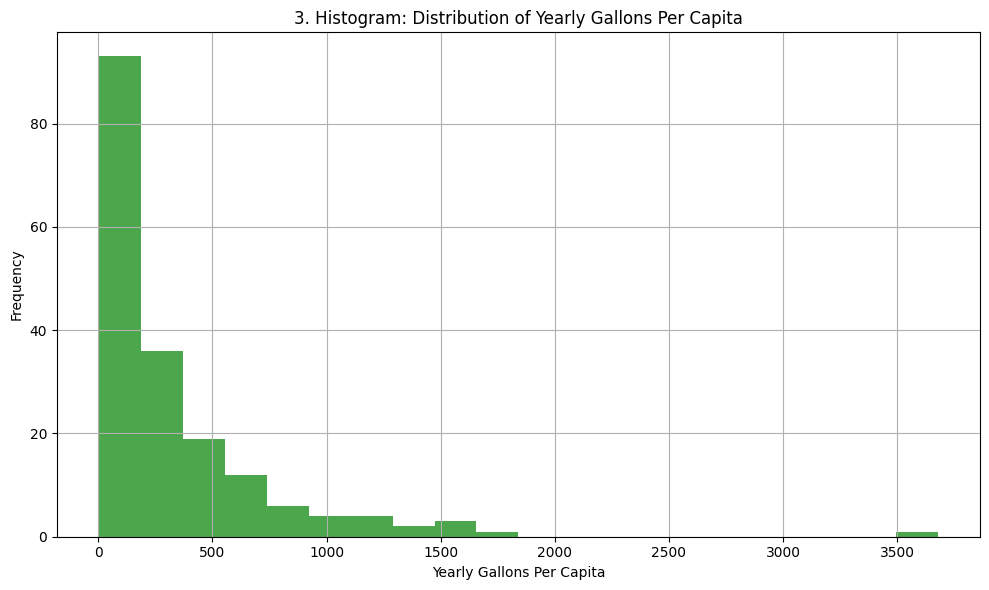

S#                                      0
Country                                 0
Daily Oil Consumption (Barrels)         0
World Share                             0
Yearly Gallons Per Capita               0
Price Per Gallon (USD)                  0
Price Per Liter (USD)                   0
Price Per Liter (PKR)                   0
GDP Per Capita ( USD )                  0
Gallons GDP Per Capita Can Buy          0
xTimes Yearly Gallons Per Capita Buy    0
dtype: int64


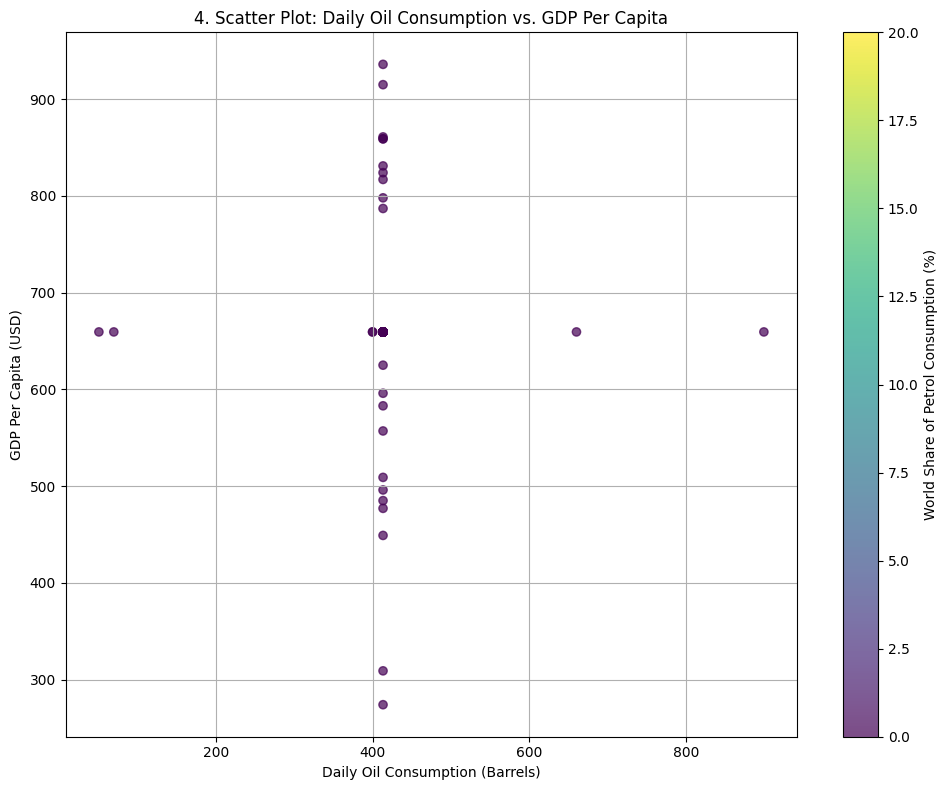

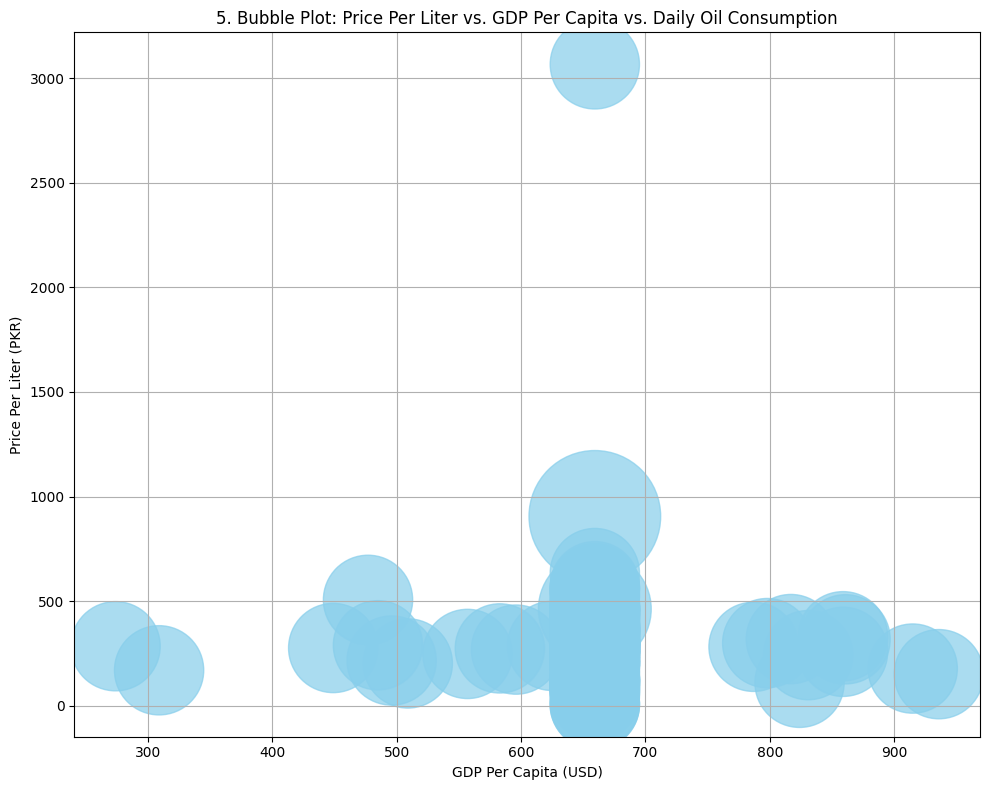

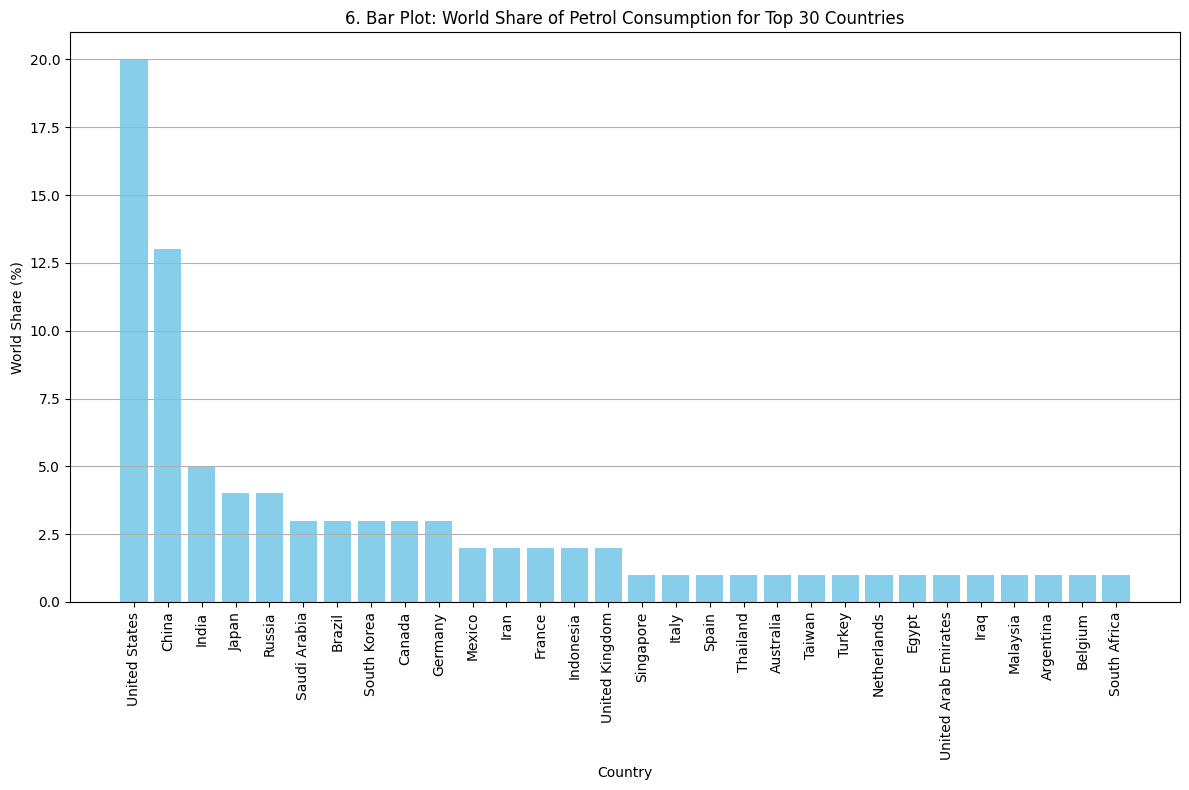

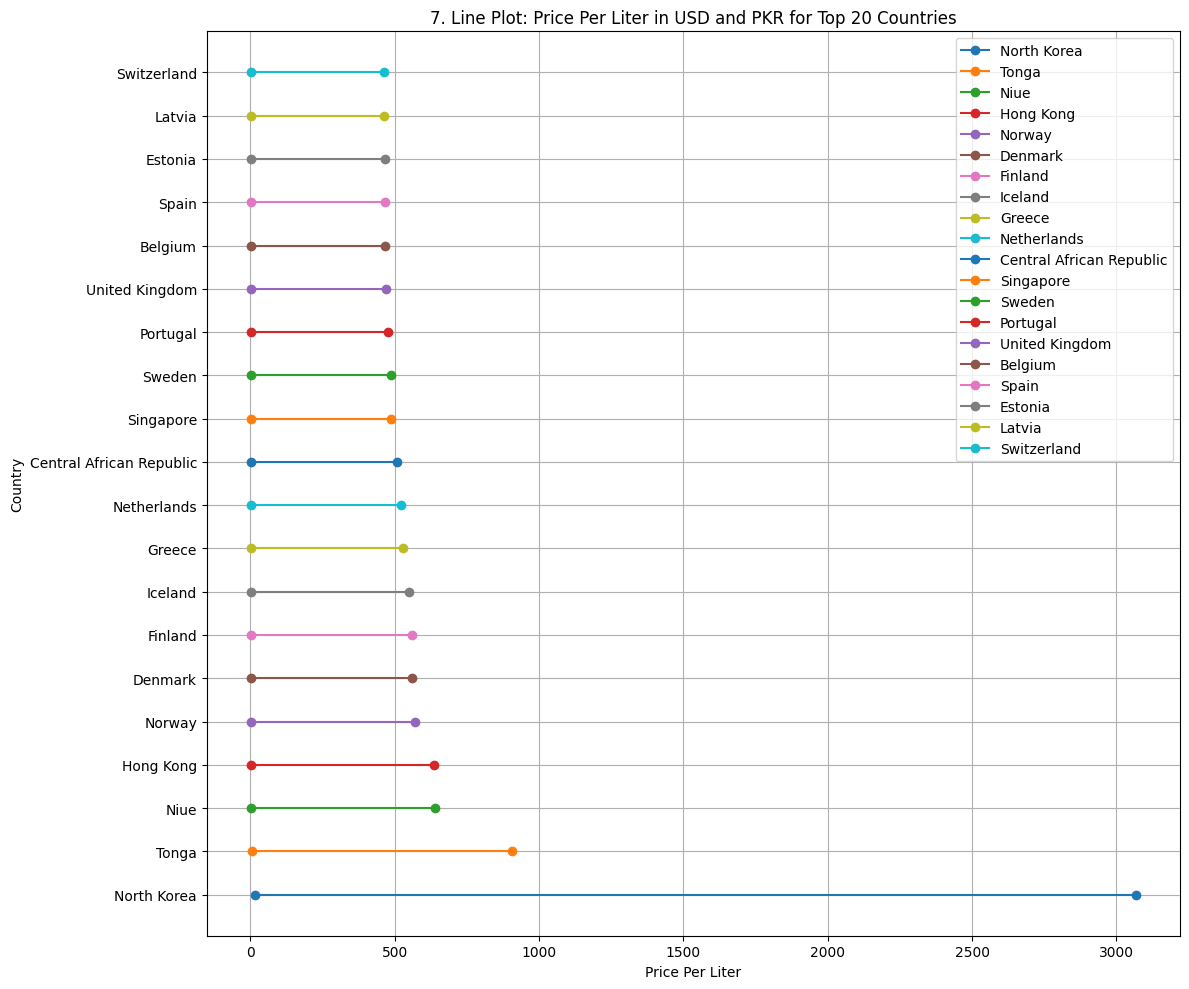

<ipython-input-35-c4d9718f70ac>:151: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-35-c4d9718f70ac>:151: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-35-c4d9718f70ac>:151: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-35-c4d9718f70ac>:151: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-35-c4d9718f70ac>:151: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-35-c4d9718f70ac>:151: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future versi

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


csv_file = 'Petrol_Gas_Prices_Worldwide.csv'
df = pd.read_csv(csv_file, encoding='ISO-8859-1')


df_sorted = df.sort_values(by='GDP Per Capita ( USD )')

# Visualization 1: Scatter plot to show the correlation between GDP per capita and price per liter
plt.figure(figsize=(16, 8))
plt.scatter(df_sorted['GDP Per Capita ( USD )'], df_sorted['Price Per Liter (PKR)'], color='blue', alpha=0.7)
plt.title('1. Scatter Plot: GDP Per Capita vs. Price Per Liter', fontsize=16)
plt.xlabel('GDP Per Capita (USD)', fontsize=14)
plt.ylabel('Price Per Liter (PKR)', fontsize=14)
plt.grid(True)
plt.tight_layout()


plt.xticks(ticks=range(0, len(df_sorted['GDP Per Capita ( USD )']), 10), rotation=30, ha='right')

plt.show()



df['Daily Oil Consumption (Barrels)'] = pd.to_numeric(df['Daily Oil Consumption (Barrels)'], errors='coerce')
df['GDP Per Capita ( USD )'] = pd.to_numeric(df['GDP Per Capita ( USD )'], errors='coerce')

# Visualization 2: Box plot to identify outliers in the relationship between daily oil consumption per capita and GDP per capita
plt.figure(figsize=(10, 6))
plt.boxplot([df['Daily Oil Consumption (Barrels)'].dropna(), df['GDP Per Capita ( USD )'].dropna()], labels=['Daily Oil Consumption', 'GDP Per Capita'])
plt.title('2. Box Plot: Daily Oil Consumption and GDP Per Capita')
plt.ylabel('Value')
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualization 3: Histogram to show the distribution of yearly gallons per capita
plt.figure(figsize=(10, 6))
plt.hist(df['Yearly Gallons Per Capita'], bins=20, color='green', alpha=0.7)
plt.title('3. Histogram: Distribution of Yearly Gallons Per Capita')
plt.xlabel('Yearly Gallons Per Capita')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


df['Daily Oil Consumption (Barrels)'].fillna(df['Daily Oil Consumption (Barrels)'].mean(), inplace=True)
df['GDP Per Capita ( USD )'].fillna(df['GDP Per Capita ( USD )'].mean(), inplace=True)

print(df.isnull().sum())

df['World Share'] = df['World Share'].str.rstrip('%').astype(float)

# Visualization 4: Relationship between daily oil consumption and GDP per capita, colored by world share of petrol consumption
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['Daily Oil Consumption (Barrels)'], df['GDP Per Capita ( USD )'], c=df['World Share'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='World Share of Petrol Consumption (%)')
plt.title('4. Scatter Plot: Daily Oil Consumption vs. GDP Per Capita')
plt.xlabel('Daily Oil Consumption (Barrels)')
plt.ylabel('GDP Per Capita (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualization 5: Bubble plot to show the relationship between price per liter, GDP per capita, and daily oil consumption
plt.figure(figsize=(10, 8))
plt.scatter(df['GDP Per Capita ( USD )'], df['Price Per Liter (PKR)'], s=df['Daily Oil Consumption (Barrels)'] * 10, c='skyblue', alpha=0.7)
plt.title('5. Bubble Plot: Price Per Liter vs. GDP Per Capita vs. Daily Oil Consumption')
plt.xlabel('GDP Per Capita (USD)')
plt.ylabel('Price Per Liter (PKR)')
plt.grid(True)
plt.tight_layout()
plt.show()


top_30_countries = df.nlargest(30, 'World Share')


plt.figure(figsize=(12, 8))
plt.bar(top_30_countries['Country'], top_30_countries['World Share'], color='skyblue')
plt.title('6. Bar Plot: World Share of Petrol Consumption for Top 30 Countries')
plt.xlabel('Country')
plt.ylabel('World Share (%)')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


top_20_countries = df.nlargest(20, 'Price Per Liter (PKR)')

# Visualization 7: Line plot comparing price per liter in USD and PKR for the top 20 countries
plt.figure(figsize=(12, 10))
for index, row in top_20_countries.iterrows():
    plt.plot([row['Price Per Liter (USD)'], row['Price Per Liter (PKR)']], [row['Country'], row['Country']], marker='o', label=row['Country'])

plt.title('7. Line Plot: Price Per Liter in USD and PKR for Top 20 Countries')
plt.xlabel('Price Per Liter')
plt.ylabel('Country')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Visualization 8: Plotting Petrol Prices Worldwide using Plotly Express

data = pd.read_csv("Petrol_Gas_Prices_Worldwide.csv", encoding='ISO-8859-1')


data['Price_per_Liter_PKR'] = data['Price Per Gallon (USD)'] * 3.78541 * 211.5


fig = px.scatter_geo(data, locations="Country", locationmode="country names",
                     color="Price_per_Liter_PKR", hover_name="Country",
                     size="Price_per_Liter_PKR", projection="natural earth",
                     title="Petrol Prices Worldwide (PKR)")
fig.show()

# Visualization 9

import pandas as pd
import plotly.express as px


data = pd.read_csv("Petrol_Gas_Prices_Worldwide.csv", encoding='ISO-8859-1')


usd_to_pkr = 169.50
data['Price_in_PKR'] = data['Price Per Liter (PKR)']


region_mapping = {
    "Asia": ["China", "India", "Japan", "Indonesia", "Pakistan", "Bangladesh", "Philippines", "Vietnam", "Iran", "Turkey"],
    "Europe": ["Russia", "Germany", "United Kingdom", "France", "Italy", "Spain", "Ukraine", "Poland", "Romania", "Netherlands"],
    "North America": ["United States", "Canada", "Mexico", "Cuba", "Haiti", "Dominican Republic", "Guatemala", "Jamaica", "Honduras", "El Salvador"],
    "South America": ["Brazil", "Argentina", "Colombia", "Peru", "Venezuela", "Chile", "Ecuador", "Bolivia", "Paraguay", "Uruguay"],
    "Africa": ["Nigeria", "Ethiopia", "Egypt", "DR Congo", "Tanzania", "South Africa", "Kenya", "Uganda", "Algeria", "Sudan"],
    "Oceania": ["Australia", "Papua New Guinea", "New Zealand", "Fiji", "Solomon Islands", "Vanuatu", "Samoa", "Kiribati", "Tonga", "Micronesia"]
}


avg_prices_by_region = pd.DataFrame(columns=['Region', 'Average_Price_in_PKR'])


for region, countries in region_mapping.items():
    avg_price = data[data['Country'].isin(countries)]['Price_in_PKR'].mean()
    avg_prices_by_region = avg_prices_by_region.append({'Region': region, 'Average_Price_in_PKR': avg_price}, ignore_index=True)


fig = px.bar(avg_prices_by_region, x='Region', y='Average_Price_in_PKR',
             title='Average Petrol/Gas Prices by Region (PKR)',
             labels={'Average_Price_in_PKR': 'Average Price (PKR)'})

fig.show()

# Visualization 10

import pandas as pd
import plotly.express as px

data = pd.read_csv("Petrol_Gas_Prices_Worldwide.csv", encoding='ISO-8859-1')


usd_to_pkr = 169.50
data['Price_in_PKR'] = data['Price Per Liter (PKR)']


average_price = data['Price_in_PKR'].mean()


data['Price_Class'] = data['Price_in_PKR'].apply(lambda x: 'Above Average' if x > average_price else 'Below Average')

price_class_counts = data['Price_Class'].value_counts()


fig = px.pie(values=price_class_counts, names=price_class_counts.index, title='Distribution of Countries by Petrol Price Relative to Global Average')
fig.show()

# Visualization 11
import pandas as pd
import plotly.graph_objs as go


data = pd.read_csv("Petrol_Gas_Prices_Worldwide.csv", encoding='ISO-8859-1')


data = data.sort_values(by='Country')


data['Difference'] = data['xTimes Yearly Gallons Per Capita Buy'].diff()
data.loc[0, 'Difference'] = data.loc[0, 'xTimes Yearly Gallons Per Capita Buy']

fig = go.Figure(go.Waterfall(
    name="",
    orientation="v",
    measure=["relative"] * len(data),
    x=data['Country'],
    y=data['Difference'],
    connector={"line": {"color": "rgb(63, 63, 63)"}},
))


fig.update_layout(
    title="Petrol/Gas xTimes Yearly Gallons Per Capita Buy Waterfall Chart",
    xaxis_title="Country",
    yaxis_title="Change in xTimes Yearly Gallons Per Capita Buy",
)


fig.show()

# Visualization 12
import pandas as pd
import plotly.express as px


data = pd.read_csv("Petrol_Gas_Prices_Worldwide.csv", encoding='ISO-8859-1')


fig = px.scatter(data, x="Daily Oil Consumption (Barrels)", y=data.index, color="Country",
                 title='Daily Oil Consumption by Country', labels={"Daily Oil Consumption (Barrels)": "Daily Oil Consumption (Barrels)"})


fig.update_traces(textposition='top center')
fig.update_layout(xaxis_title='Daily Oil Consumption (Barrels)', yaxis_title='Country', legend_title='Country')
fig.update_yaxes(visible=False)


fig.show()

